In [1]:
# !jupyter trust ./decision_tree_regression.ipynb

# Decision Tree Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Example 1: `drug_dosage.csv`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

p = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Regresja/data/drug_dosage.csv"
df = pd.read_csv(p)
display(df.head())

X = df['Dosage'].values.reshape(-1, 1)
y = df['Drug Effectivnes'].values

,Dosage,Drug Effectivnes
0,2,0.0
1,4,0.0
2,6,0.0
3,8,0.0
4,10,3.0


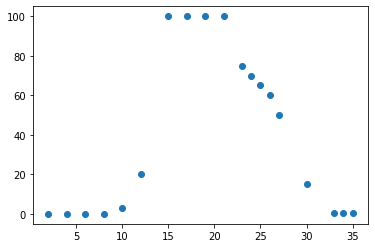

In [4]:
plt.scatter(X, y)

### Check linear regression

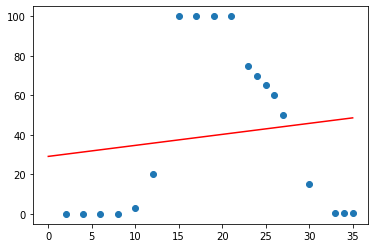

In [5]:
from sklearn.linear_model import LinearRegression

r = LinearRegression()
r.fit(X, y)

x_lin = np.linspace(0, 35, 100).reshape(-1, 1)
y_lin = r.predict(x_lin)

plt.scatter(X, y)
plt.plot(x_lin, y_lin, color='red')
plt.show()

### Train Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

#### No limit

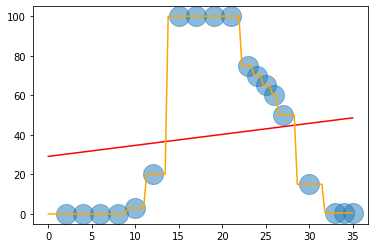

In [7]:
dr = DecisionTreeRegressor()
dr.fit(X, y)

y_lin_dr = dr.predict(x_lin)

plt.scatter(X, y, s=400, alpha=0.5)
plt.plot(x_lin, y_lin, color='red')
plt.plot(x_lin, y_lin_dr, color='orange')
plt.show()

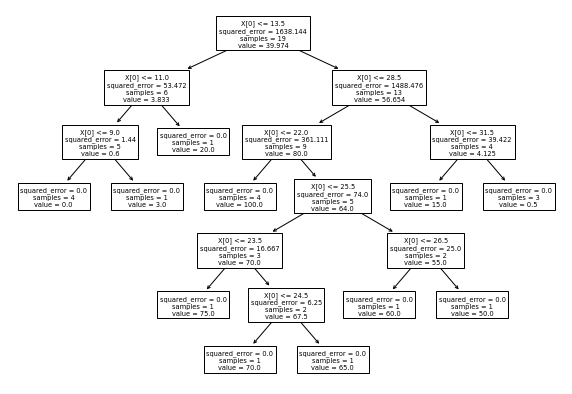

In [8]:
from sklearn import tree

plt.figure(figsize=(10, 7))
tree.plot_tree(dr)
plt.show()

#### "Regularization"

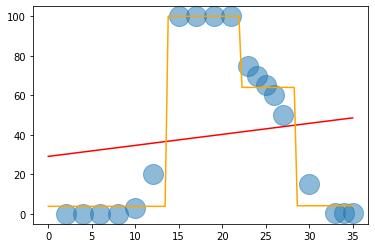

In [9]:
dr = DecisionTreeRegressor(min_samples_split=7)
dr.fit(X, y)

y_lin_dr = dr.predict(x_lin)

plt.scatter(X, y, s=400, alpha=0.5)
plt.plot(x_lin, y_lin, color='red')
plt.plot(x_lin, y_lin_dr, color='orange')
plt.show()

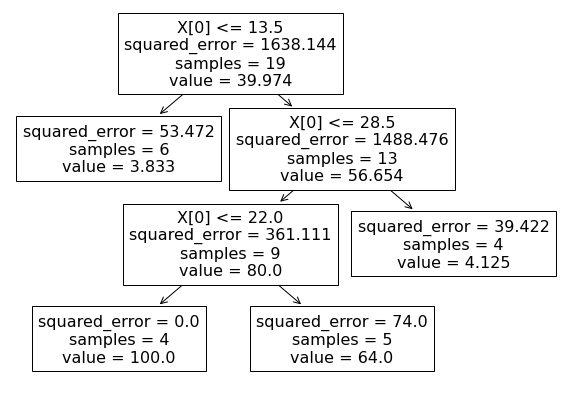

In [10]:
from sklearn import tree

plt.figure(figsize=(10, 7))
tree.plot_tree(dr)
plt.show()

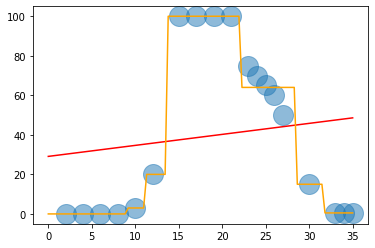

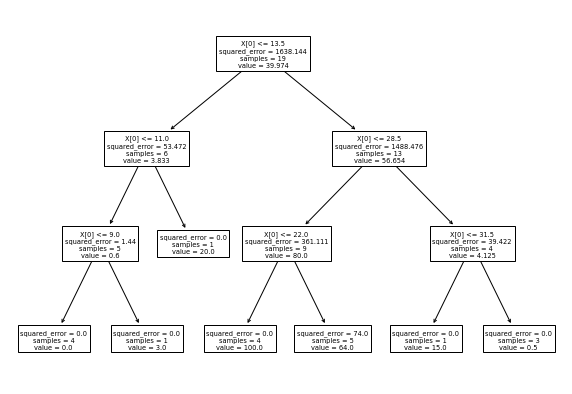

In [11]:
dr = DecisionTreeRegressor(max_depth=3)
dr.fit(X, y)

y_lin_dr = dr.predict(x_lin)

plt.scatter(X, y, s=400, alpha=0.5)
plt.plot(x_lin, y_lin, color='red')
plt.plot(x_lin, y_lin_dr, color='orange')
plt.show()

plt.figure(figsize=(10, 7))
tree.plot_tree(dr)
plt.show()

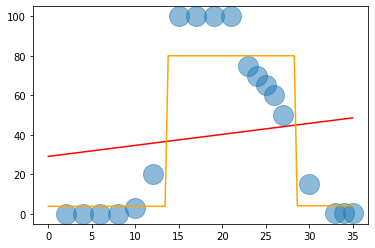

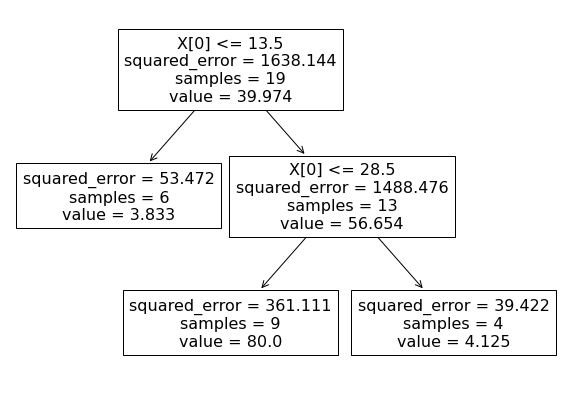

In [12]:
dr = DecisionTreeRegressor(max_depth=4, min_samples_split=10)
dr.fit(X, y)

y_lin_dr = dr.predict(x_lin)

plt.scatter(X, y, s=400, alpha=0.5)
plt.plot(x_lin, y_lin, color='red')
plt.plot(x_lin, y_lin_dr, color='orange')
plt.show()

plt.figure(figsize=(10, 7))
tree.plot_tree(dr)
plt.show()

## Example 2: `Position_Salaries.csv`

### Importing the dataset

In [13]:
df = pd.read_csv('data/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [14]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

### Training the Decision Tree Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

### Predicting a new result

In [16]:
regressor.predict([[6.5]])

array([150000.])

### Visualising the Decision Tree Regression results

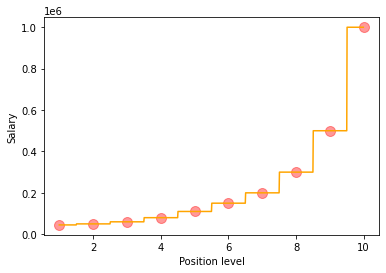

In [17]:
X_grid = np.arange(X.min(), X.max(), 0.01)
X_grid = X_grid.reshape(X_grid.shape[0], 1)

plt.scatter(X, y, color = 'red', s=100, alpha=0.4)
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<hr>

## Example 3: `tree_data.pkl`

In [18]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [19]:
# # Create a random dataset
# rng = np.random.RandomState(1)
# X = np.sort(5 * rng.rand(80, 1), axis=0)
# y = np.sin(X).ravel()
# y[::5] += 3 * (0.5 - rng.rand(16))

# pd.DataFrame({'position': X.ravel(),
#               'value': y}).to_pickle("data/tree_data.pkl")

In [20]:
df = pd.read_pickle("data/tree_data.pkl")
df.head()

X = df.position
y = df.value

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                     X, y, test_size=0.33, random_state=42)

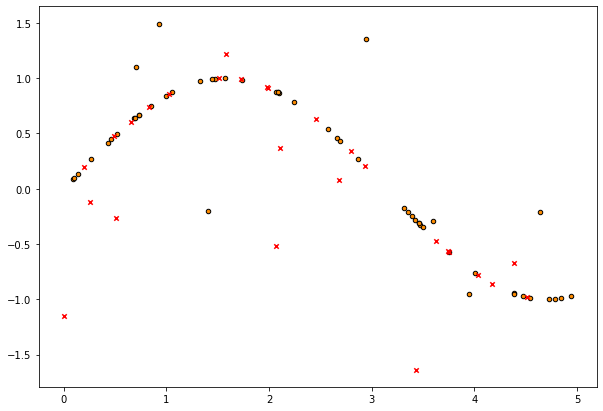

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(X_test, y_test, s=20, c='red', label="data", marker='x')
plt.show()

In [23]:
# Fit regression model
regr_0 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_5 = DecisionTreeRegressor(max_depth=5)

regr_0.fit(X_train.values.reshape(-1, 1), y_train)
regr_2.fit(X_train.values.reshape(-1, 1), y_train)
regr_5.fit(X_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
# Predict
X_test_l = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_0 = regr_0.predict(X_test_l)
y_2 = regr_2.predict(X_test_l)
y_5 = regr_5.predict(X_test_l)

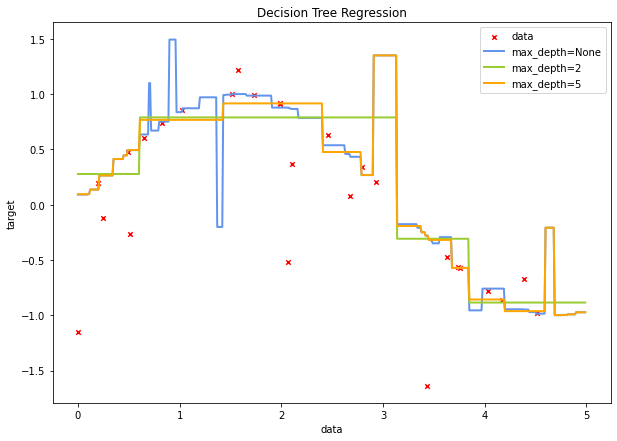

In [25]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, s=20, c='red', marker='x', label="data")
plt.plot(X_test_l, y_0, color="cornflowerblue", label="max_depth=None", linewidth=2)
plt.plot(X_test_l, y_2, color="yellowgreen", label="max_depth=2", linewidth=2)
plt.plot(X_test_l, y_5, color="orange", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<hr>